# Email spam detection

Fatikhov Artur

## Table of Contents
1. Introduction
2. Understanding data
3. Data processing
4. Data visualization
5. Creating dataset for model
6. Creating model
7. Interpretation of the results

## 1. Introdutcion

In this jupyter notebook I will create an ML model that will predict whether the email spam or not. I will use kaggle dataset(https://www.kaggle.com/datasets/mfaisalqureshi/spam-email) and I will use Multinomial classifier.


#### Content
Data is a csv file that has two columns: Category and Message. The first columns has two vaules(ham, spam) only and the second one has the email itself.


Importing everything I need for this project

In [202]:
# Importing necessary libraries
import numpy as np        # For numerical operations
import pandas as pd       # For data manipulation and analysis
import matplotlib.pyplot as plt  # For data visualization
%matplotlib inline

# Importing WordCloud for text visualization
from wordcloud import WordCloud

# Importing NLTK for natural language processing
import nltk
from nltk.corpus import stopwords    # For stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Downloading NLTK data
nltk.download('stopwords')   # Downloading stopwords data
nltk.download('punkt')       # Downloading tokenizer data



from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
from sklearn.pipeline import Pipeline

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/luizamazitova/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/luizamazitova/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [200]:
!conda install -y xgboost

Channels:
 - defaults
Platform: osx-arm64
Solving environment: done

## Package Plan ##

  environment location: /opt/anaconda3

  added / updated specs:
    - xgboost


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _py-xgboost-mutex-2.0      |            cpu_0          13 KB
    libxgboost-2.0.3           |       h313beb8_0         2.8 MB
    py-xgboost-2.0.3           |  py311hca03da5_0         370 KB
    xgboost-2.0.3              |  py311hca03da5_0          11 KB
    ------------------------------------------------------------
                                           Total:         3.2 MB

The following NEW packages will be INSTALLED:

  _py-xgboost-mutex  pkgs/main/osx-arm64::_py-xgboost-mutex-2.0-cpu_0 
  libxgboost         pkgs/main/osx-arm64::libxgboost-2.0.3-h313beb8_0 
  py-xgboost         pkgs/main/osx-arm64::py-xgboost-2.0.3-py311hca03da5_0 
  xgboost            pkgs/main

## 2. Understanding data

Loading data using pandas from csv

In [142]:
df = pd.read_csv('spam.csv', encoding='latin1')

Looking at the data

In [144]:
print(df.head())

  Category                                            Message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


Data is clean and has no null values

## 2. Data precessing

Changing all "ham" values to 0 and "spam" values to 1

In [148]:
df['Category'] = df['Category'].apply(lambda x: 0 if x == 'ham' else 1)

In [150]:
print(df.head())

   Category                                            Message
0         0  Go until jurong point, crazy.. Available only ...
1         0                      Ok lar... Joking wif u oni...
2         1  Free entry in 2 a wkly comp to win FA Cup fina...
3         0  U dun say so early hor... U c already then say...
4         0  Nah I don't think he goes to usf, he lives aro...


Checking for dupicates

In [153]:
df.duplicated().sum()

415

Dropping dupicates

In [156]:
df = df.drop_duplicates(keep = 'first')

In [158]:
df.shape

(5157, 2)

Making all lowecase

In [170]:
df['Message']=df['Message'].apply(lambda x: x.lower())
df['Message']

0       go until jurong point, crazy.. available only ...
1                           ok lar... joking wif u oni...
2       free entry in 2 a wkly comp to win fa cup fina...
3       u dun say so early hor... u c already then say...
4       nah i don't think he goes to usf, he lives aro...
                              ...                        
5567    this is the 2nd time we have tried 2 contact u...
5568                will ã¼ b going to esplanade fr home?
5569    pity, * was in mood for that. so...any other s...
5570    the guy did some bitching but i acted like i'd...
5571                           rofl. its true to its name
Name: Message, Length: 5157, dtype: object

## 4. Data visualization

In [161]:
catefories_num = df['Category'].value_counts() # counted both categories
total = catefories_num.sum()

percentage_0 = (values[0] /total) * 100 # created percentage of both categories
percentage_1 = (values[1]/ total) *100

print('percentage of 0 :' ,percentage_0)
print('percentage of 1 :' ,percentage_1)

percentage of 0 : 87.5702928058949
percentage of 1 : 12.429707194105099


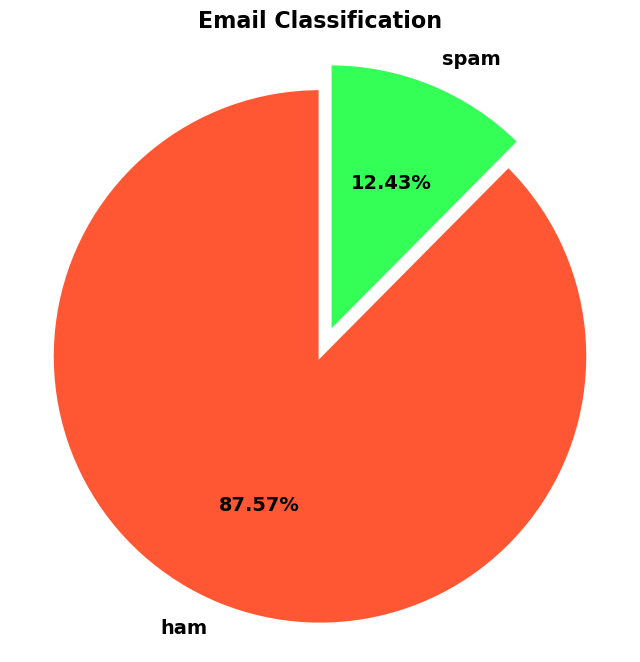

In [165]:
import matplotlib.pyplot as plt

# defined custom colors
colors = ['#FF5733', '#33FF57']

# defined the explode parameter to create a gap between slices
explode = (0, 0.1) 

# created a plt fig
fig, ax = plt.subplots(figsize=(8, 8))


# created pie chart
wedges, texts, autotexts = ax.pie(
    values, labels=['ham', 'spam'],
    autopct='%0.2f%%',
    startangle=90,
    colors=colors,
    wedgeprops={'linewidth': 2, 'edgecolor': 'white'},
    explode=explode,  # Apply the explode parameter
)


# customized text properties
for text, autotext in zip(texts, autotexts):
    text.set(size=14, weight='bold')
    autotext.set(size=14, weight='bold')

# added a title
ax.set_title('Email Classification', fontsize=16, fontweight='bold')

# equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')

plt.show()

As we can see on the pie we have hude amount of hum email and only 12.43% is spam. It's class imbalance.
To come up with this issue we can use upsampling or undersampling. Both have it's cons and prons. I'll use undersampling in my case.

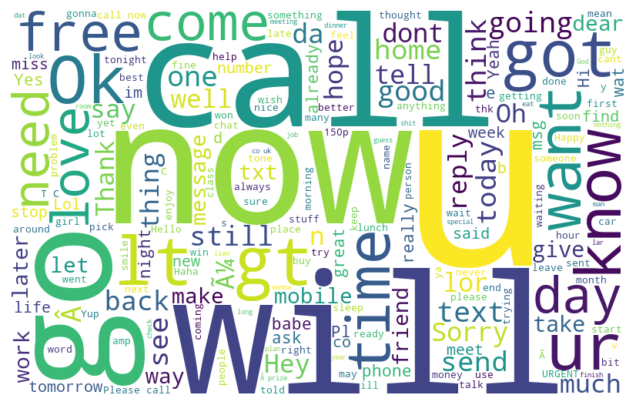

In [167]:
# check wordcloud
text=' '.join(df['Message'])
wordcloud=WordCloud(width=800,height=500,background_color='white').generate(text)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

## 5. Creating dataset for model

In [173]:
X=df['Message']
y=df['Category']

In [180]:
X_train1,X_test1,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

#### TF-IDF (Term Frequency-Inverse Document Frequency)

In [187]:
# Initialize the TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Fit the vectorizer on the training data and transform the training data
X_train = vectorizer.fit_transform(X_train1)

# Transform the test data using the same vectorizer
X_test = vectorizer.transform(X_test1)

## 6. Creating model

In [204]:
bc = BaggingClassifier(n_estimators=50, random_state=42)
etc = ExtraTreesClassifier(n_estimators=50, random_state=42)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=42)
xgb = XGBClassifier(n_estimators=50, random_state=42)
svc = SVC(kernel="sigmoid", gamma=1.0)
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=10)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=42)
abc = AdaBoostClassifier(n_estimators=50, random_state=42)


models = {
    'BGC': bc,
    'ETC': etc,
    'GBDT': gbdt,
    'xgb': xgb,
    'SVC': svc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'Adaboost': abc
}

def train_classifier(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    return accuracy, precision

In [206]:
%%time
accuracy_scores = []
precision_scores = []

# Iterate over the items in the clfs dictionary
for name, model in models.items():
    current_accuracy, current_precision = train_classifier(model, X_train, y_train, X_test, y_test)
    rounded_accuracy = round(current_accuracy, 2)
    rounded_precision = round(current_precision, 2)
    
    print()
    print("For: ", name)
    print("Accuracy: ", rounded_accuracy)
    print("Precision: ", rounded_precision)

    accuracy_scores.append(rounded_accuracy)
    precision_scores.append(rounded_precision)


For:  BGC
Accuracy:  0.96
Precision:  0.89

For:  ETC
Accuracy:  0.98
Precision:  0.98

For:  GBDT
Accuracy:  0.96
Precision:  0.94

For:  xgb
Accuracy:  0.97
Precision:  0.91

For:  SVC
Accuracy:  0.99
Precision:  0.97

For:  NB
Accuracy:  0.95
Precision:  1.0

For:  DT
Accuracy:  0.96
Precision:  0.87

For:  LR
Accuracy:  0.96
Precision:  0.92

For:  RF
Accuracy:  0.98
Precision:  0.99

For:  Adaboost
Accuracy:  0.97
Precision:  0.93
CPU times: user 7.71 s, sys: 799 ms, total: 8.51 s
Wall time: 5.99 s


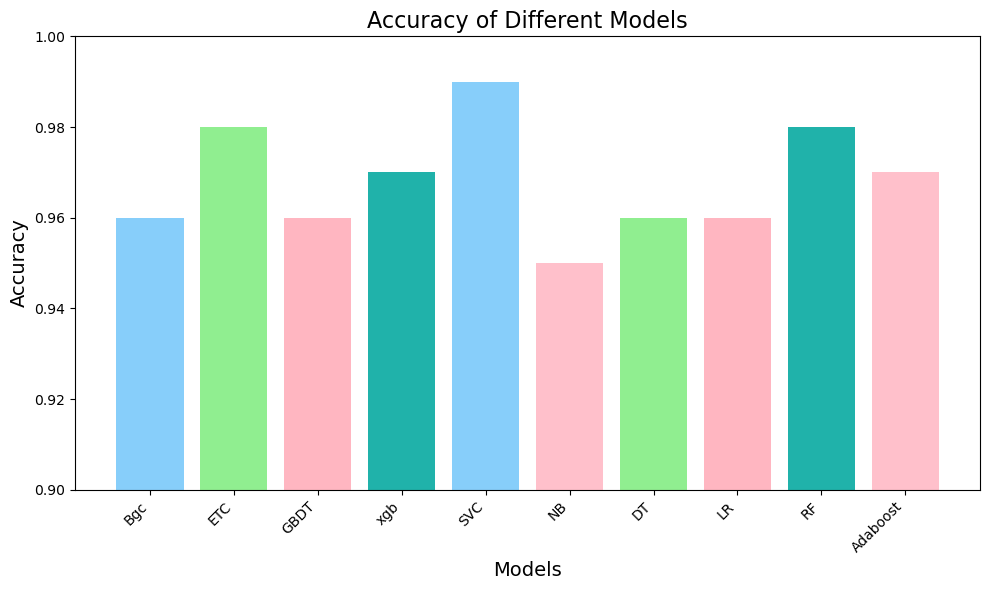

In [208]:
# Model names
models = ['Bgc', 'ETC', 'GBDT', 'xgb', 'SVC', 'NB', 'DT', 'LR', 'RF', 'Adaboost']

# Accuracy scores for each model
accuracy_scores = [0.96, 0.98, 0.96, 0.97, 0.99, 0.95, 0.96, 0.96, 0.98, 0.97]

# Define lighter tint colors for each model
color = ['lightskyblue', 'lightgreen', 'lightpink', 'lightseagreen',
                 'lightskyblue', 'pink', 'lightgreen', 'lightpink', 'lightseagreen', 'pink']

# Plot
plt.figure(figsize=(10, 6))
plt.bar(models, accuracy_scores, color=color)
plt.xlabel('Models', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Accuracy of Different Models', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.ylim(0.9, 1)  # Set the y-axis limits for better visualization
plt.tight_layout()
plt.show()

In [210]:
#create a new model with pipeline
NB1 = Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('nb', MultinomialNB())
])

In [212]:
NB1.fit(X_train1,y_train)


Pipeline(steps=[('vectorizer', TfidfVectorizer()), ('nb', MultinomialNB())])

In [214]:
emails=[
    'Hey mohan, can we get together to watch footbal game tomorrow?',
    'hi, how are you?',
    'Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!',
    'i won free vacation , you can win click below link',
    "Hey Sarah, are you available for a coffee chat this weekend?",
    "Congratulations! You've been selected as the winner of a $1000 cash prize. Click the link to claim your reward now!"
    'Claim your exclusive discount code now and save 30% on your next purchase! Limited time offer!',
    "You've won a luxury vacation package! Click the link to claim your prize and enjoy a dream getaway!",
    'Get rich quick with our investment opportunity! Join now and start earning big profits!',
    'Hey there, how about catching up for lunch this weekend? It\'s been a while since we last met!',
    'Reminder: Your appointment with the doctor is scheduled for tomorrow at 10 AM. Please remember to bring any necessary documents.',
    'Invitation: Join us for a team-building event this Friday at the local park. Food and games provided!'

]

In [216]:
#predict new emails
NB1.predict(emails)

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

In [218]:
# Create a new model with pipeline
SVC1 = Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('classifier', SVC())
])

# Fit the model
SVC1.fit(X_train1, y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()), ('classifier', SVC())])

In [220]:
emails=[
    'Hey mohan, can we get together to watch footbal game tomorrow?',
    'hi, how are you?',
    'Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!',
    'i won free vacation , you can win click below link',
    "Hey Sarah, are you available for a coffee chat this weekend?",
    "Congratulations! You've been selected as the winner of a $1000 cash prize. Click the link to claim your reward now!"
    'Claim your exclusive discount code now and save 30% on your next purchase! Limited time offer!',
    "You've won a luxury vacation package! Click the link to claim your prize and enjoy a dream getaway!",
    'Get rich quick with our investment opportunity! Join now and start earning big profits!',
    'Hey there, how about catching up for lunch this weekend? It\'s been a while since we last met!',
    'Reminder: Your appointment with the doctor is scheduled for tomorrow at 10 AM. Please remember to bring any necessary documents.',
    'Invitation: Join us for a team-building event this Friday at the local park. Food and games provided!'

]

In [222]:
#predict new emails
SVC1.predict(emails)

array([0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0])

In [226]:
print(X_train)

  (0, 3007)	0.36638722405656987
  (0, 3166)	0.36514830259605585
  (0, 3483)	0.1725401736131757
  (0, 3489)	0.38444570736833195
  (0, 3538)	0.38444570736833195
  (0, 4162)	0.2653452772865466
  (0, 4490)	0.32270334511605386
  (0, 4812)	0.14824870480449487
  (0, 5816)	0.23079119733447062
  (0, 6824)	0.09733283894148857
  (0, 6882)	0.38444570736833195
  (1, 932)	0.16161375071154274
  (1, 1018)	0.38855385441737533
  (1, 3483)	0.4276414543762243
  (1, 4318)	0.425851824140159
  (1, 4855)	0.18874506232575847
  (1, 5509)	0.282610824329196
  (1, 6170)	0.38989189325962686
  (1, 6699)	0.14791687746132073
  (1, 6824)	0.12061989950474489
  (1, 7083)	0.21311461828514466
  (1, 7372)	0.21877413232688148
  (1, 7600)	0.24791554785295725
  (2, 940)	0.563334996663829
  (2, 1860)	0.5053133158858294
  :	:
  (4124, 3098)	0.19285660721405323
  (4124, 3116)	0.1648670390362837
  (4124, 3147)	0.2541423145448762
  (4124, 3437)	0.10011295388405636
  (4124, 3558)	0.08453868360583228
  (4124, 3699)	0.0676925573337282

Tokenizing

In [127]:
df['num_characters'] = df['Message'].apply(len)
df['num_words'] = df['Message'].apply(lambda x: len(nltk.word_tokenize(x)))
df['num_sentence'] = df['Message'].apply(lambda x: len(nltk.sent_tokenize(x)))

/var/folders/n4/3ps4h29s51x3q3whhs04ryt40000gn/T/ipykernel_36617/2429531392.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characters'] = df['Message'].apply(len)
/var/folders/n4/3ps4h29s51x3q3whhs04ryt40000gn/T/ipykernel_36617/2429531392.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words'] = df['Message'].apply(lambda x: len(nltk.word_tokenize(x)))
/var/folders/n4/3ps4h29s51x3q3whhs04ryt40000gn/T/ipykernel_36617/2429531392.py:3: SettingWithCopyWarning: 
A value is trying to be s

In [131]:
print(df[['num_characters', 'num_words', 'num_sentence']].describe())

       num_characters    num_words  num_sentence
count     5157.000000  5157.000000   5157.000000
mean        79.228040    18.544890      1.969750
std         58.451149    13.401415      1.455526
min          2.000000     1.000000      1.000000
25%         36.000000     9.000000      1.000000
50%         61.000000    15.000000      1.000000
75%        118.000000    26.000000      2.000000
max        910.000000   220.000000     38.000000
